In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [11]:
# Loading the options data
chains = obb.derivatives.options.chains(
    "AAPL",
    provider="cboe",
)

In [14]:
# Filters the options chains to include only call options
calls = chains[chains.option_type == "call"]

In [16]:
# Here we are filtering the calls with days to expiration under 3 months
# and with a strike price greater than 100 & removing any duplicates
calls = calls[
    (calls.dte < 100)
    & (calls.strike >= 100)
]
calls.drop_duplicates(subset=["strike", "dte"], keep=False, inplace=True)

In [18]:
# Reorganize the Dataframe to put strikes in the index, days to expiration along the columns
# and the implied volatility within the cells. Then drop rows where all values in a column is nan
vol_surface = (
    calls
    .pivot(
        index="strike",
        columns="dte",
        values="implied_volatility"
    )
    .dropna(how="all", axis=1)
)

In [20]:
# we using NumPy's meshgrid method to create a two-dimensional grid using the strike price
# and days to expiration for use in plot
strike, dte = np.meshgrid(
    vol_surface.columns,
    vol_surface.index
)

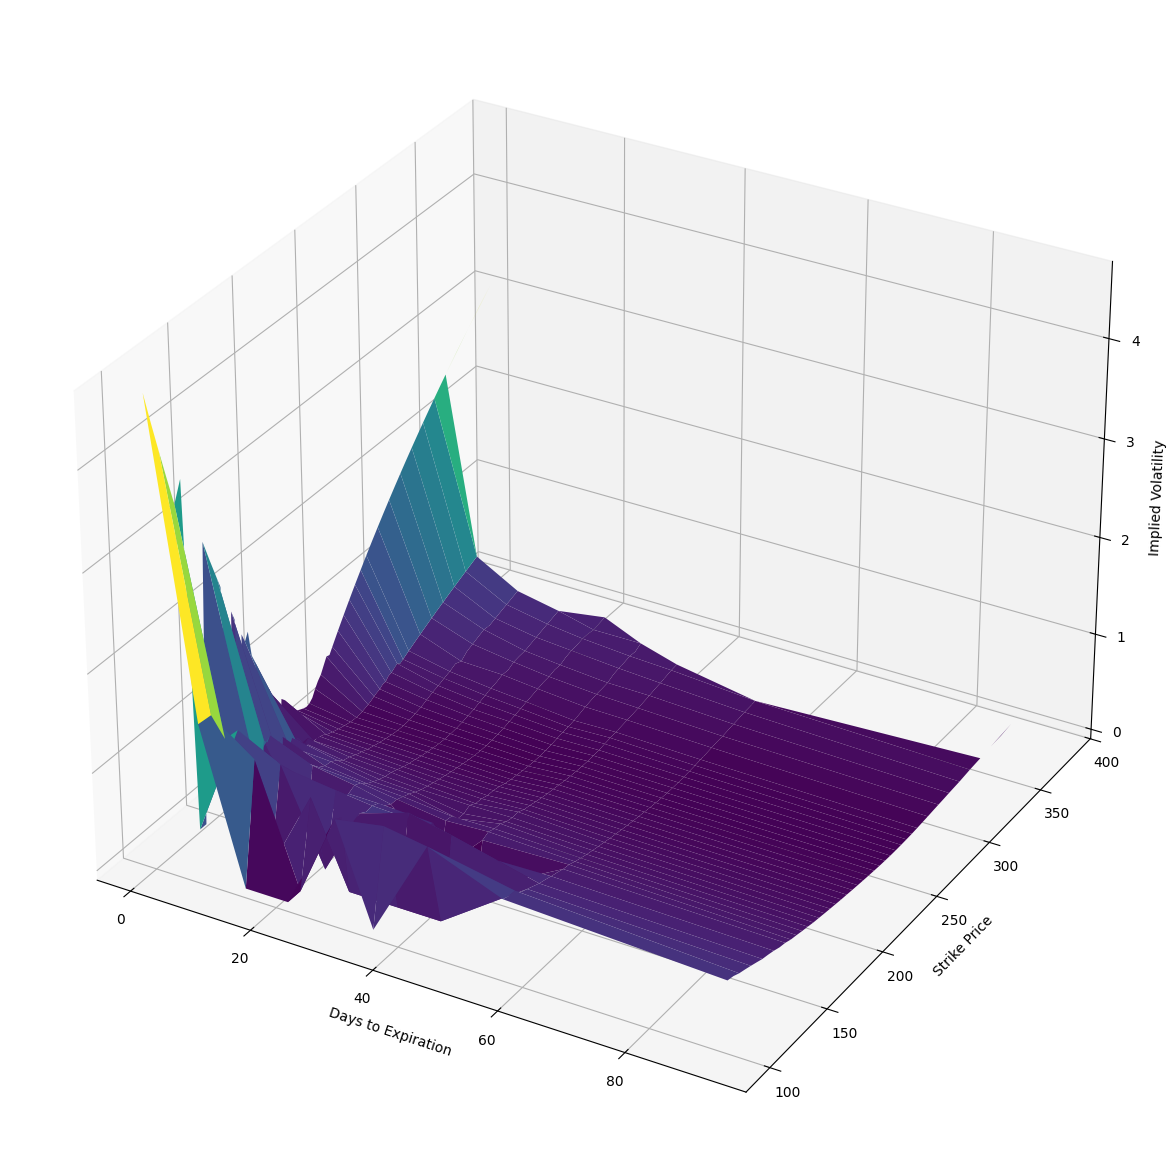

In [22]:
# Here we are plotting the surface
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Days to Expiration")
ax.set_ylabel("Strike Price")
ax.set_zlabel("Implied Volatility")
ax.plot_surface(
    strike,
    dte,
    vol_surface.values,
    cmap="viridis"
)